In [2]:
import numpy as np
import xarray as xr

data = xr.open_dataset("C:/Users/62812/Documents/Kerjaan Meteorologi/SPI/Standard-Precipitation-Index/experiment results/Model 1/DHI SPI 3.nc")

TypeError: 'KeysView' object is not subscriptable

In [1]:
import pandas as pd

path_train = "C:/Users/62812/Documents/Kerjaan Meteorologi/GPM-Correction/GPM-Correction/data/Skema Training 1.xlsx"
path_test = "C:/Users/62812/Documents/Kerjaan Meteorologi/GPM-Correction/GPM-Correction/data/Skema Testing 1.xlsx"
df_train = pd.read_excel(path_train)
df_test = pd.read_excel(path_test)

In [2]:
var_obs = ["Nama Stasiun","T2","T5","T10","T25","T50","T100"]
var_gpm = ["elevasi","jarak","latitude","longitude","pu_2yr","pu_5yr", "pu_10yr", "pu_25yr", "pu_50yr", "pu_100yr"]
predictor = ["elevasi","jarak","latitude","longitude"]

In [3]:
def convert_period_gpm(x):
    if x =="pu_2yr":
        output = 2
    if x =="pu_5yr":
        output = 5
    elif x =="pu_10yr":
        output = 10
    elif x =="pu_25yr":
        output = 25
    elif x =="pu_50yr":
        output = 50
    elif x =="pu_100yr":
        output = 100
    return output
    
def process_data(df,predictor,var_obs, var_gpm):
    #melted observation data
    df_obs = df[var_obs]
    df_obs_melted = pd.melt(df_obs, id_vars = "Nama Stasiun", var_name = "T", value_name = "precip")

    #melted gpm data
    df_gpm = df[var_gpm]
    df_gpm_melted = pd.melt(df_gpm, id_vars = predictor, var_name = "T", value_name = "precip")
    df_gpm_melted["T"] = df_gpm_melted["T"].apply(convert_period_gpm)
    #X = df_gpm_melted.values
    X = df_gpm_melted.values
    y = df_obs_melted['precip'].values
    return X,y,df_gpm_melted,df_obs_melted

In [4]:
X_train, y_train,df_gpm_melted_train,df_obs_melted_train = process_data(df_train,predictor,var_obs, var_gpm)
X_test, y_test,df_gpm_melted_test,df_obs_melted_test = process_data(df_test,predictor,var_obs, var_gpm)

In [5]:
df_obs_melted_train

,Nama Stasiun,T,precip
0,Stasiun Meteorologi Cut Nyak Dhien Nagan Raya,T2,166.689143
1,Stasiun Meteorologi Malikussaleh,T2,93.866171
2,Stasiun Meteorologi Sultan Iskandar Muda,T2,117.488865
3,Stasiun Geofisika Deli Serdang,T2,127.181653
4,Stasiun Meteorologi Binaka,T2,93.737826
...,...,...,...
571,Stasiun Meteorologi Frans Kaisiepo,T100,170.296452
572,Stasiun Meteorologi Mozez Kilangin,T100,344.500371
573,Stasiun Meteorologi Dok II Jayapura,T100,258.561406
574,Stasiun Meteorologi Tanah Merah,T100,422.707234


In [6]:
df_gpm_melted_train['precip_obs'] = df_obs_melted_train['precip']

In [7]:
X_train.shape, y_train.shape

((576, 6), (576,))

In [8]:
X_test.shape, y_test.shape

((144, 6), (144,))

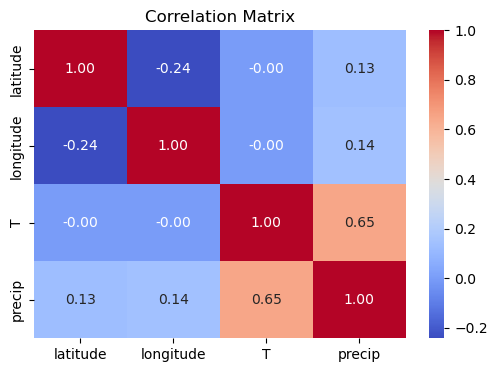

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 4: Plot the correlation matrix
correlation_matrix = df_train_gpm_metled.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [12]:
import xgboost as xgb
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

# Train the Ridge Regression model
model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha)
# model = DecisionTreeRegressor()
#model = LinearRegression()
#model = RandomForestRegressor(n_estimators=100)

# Define the XGBoost model
# model = xgb.XGBRegressor(
#     objective='reg:squarederror',  # 'reg:squarederror' for regression tasks
#     n_estimators=100,               # Number of boosting rounds
#     max_depth=2                     # Maximum depth of each tree
# )

# Train the model
model.fit(X_train, y_train)

Ridge()

In [13]:
# Now, you can use the trained model to make predictions on new data
predictions = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error

# Step 4: Calculate RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the results
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.34
Mean Squared Error: 4570.888567903997
Root Mean Squared Error: 67.60834688042591


In [ ]:
r2 = r2_score(y_test, y_pred)

In [17]:
class Evaluation:
    def __init__(self, model):
        self.model = model

    def calculate_mse(self, y_pred, y_true):
        mse = mean_squared_error(y_pred=y_pred, y_true= y_true)
        return mse

    def calculate_rmse(self, y_pred, y_true):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        return rmse
    
    def calculate_nmse_mean(self, y_pred, y_true):
        rmse = self.calculate_rmse(y_pred=y_pred , y_true=y_true)
        nmse_mean = rmse/np.mean(y_true)
        return nmse_mean
    
    def calculate_nmse_std(self, y_pred, y_true):
        rmse = self.calculate_rmse(y_pred=y_pred , y_true=y_true)
        nmse_std = rmse/np.std(y_true)
        return nmse_std
    
    def calculate_nmse_min_max(self, y_pred, y_true):
        rmse = self.calculate_rmse(y_pred=y_pred , y_true=y_true)
        nmse_min_max = rmse/(np.max(y_true) - np.min(y_true))
        return nmse_min_max
        
evaluation = Evaluation(model)

In [18]:
evaluation.calculate_nmse_min_max(y_test, predictions)

0.3044443552941354

In [19]:
evaluation.calculate_nmse_std(y_test, predictions)

1.30167854999711

In [20]:
evaluation.calculate_nmse_mean(y_test, predictions)

0.38076710632644895

In [21]:
evaluation.calculate_rmse(y_test, predictions)

67.6083468804259